In [3]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pipeline_v200
reload(pipeline_v200)
import helper_functions
import qutip

sns.set_palette("Set2")
# sns.color_palette("Set2")

In [4]:
## this notebokk is used to check if the TQFI for a random state and a given initial state
## the TQFI shoukd be independent of the initial state

n = 5 ## numero finale di qubit
N = 7 ## numero di qubit prima della traccia parziale

h_z_s = np.linspace(0, 100, num=200) # spazio dei valori di h_z

a_x= 1

delta = 0.01
derivative_delta = 1e-5

m = 16
DEBUG=True
initial_state = helper_functions.random_mixed_density_matrix(N, n)

# ket = qutip.rand_ket(2**n, distribution="haar").full().flatten()

y_s = np.array([pipeline_v200.simulation(
                        N=N,
                        n=n,
                        initial_state= None,
                        DEBUG=False,
                        derivative_delta=derivative_delta,
                        a_x= a_x, 
                        h_z= h_z, ## variable
                        delta = delta,
                        m = m) for h_z in h_z_s])

lower_tqfi = np.array([np.real(x["lower_tqfi"]) for x in y_s ])

y_s_random = np.array([pipeline_v200.simulation(
                        N=N,
                        n=n,
                        initial_state= None,
                        DEBUG=False,
                        derivative_delta=derivative_delta,
                        a_x= a_x, 
                        h_z= h_z, ## variable
                        delta = delta,
                        m = m) for h_z in h_z_s])

lower_tqfi_random = np.array([np.real(x["lower_tqfi"]) for x in y_s_random ])

Generating random mixed density matrix


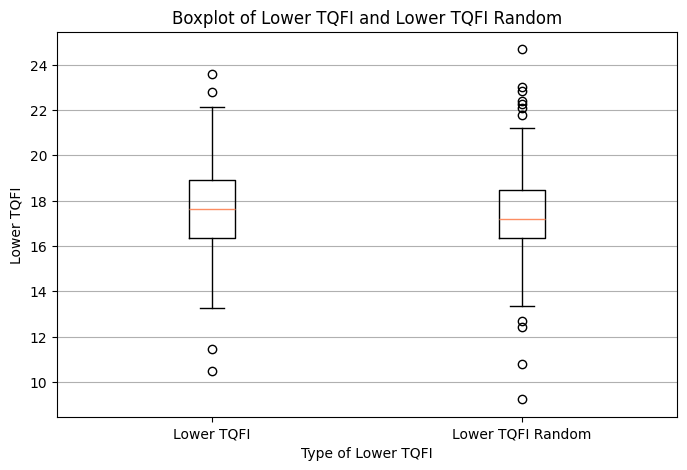

In [5]:
# Data for boxplot
data = [lower_tqfi, lower_tqfi_random]

# Create boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(data, tick_labels=['Lower TQFI', 'Lower TQFI Random'])

# Add labels and title
plt.ylabel('Lower TQFI')
plt.xlabel('Type of Lower TQFI')
#plt.xticks(rotation=45)
plt.grid(axis='y')
plt.title('Boxplot of Lower TQFI and Lower TQFI Random')
# Show the plot
plt.show()